Creating ANN model for House Price prediction



*   NAME:          Nithya R
*  REG No:        710020104310 
*   ASSIGNMENT NO: 2






Build the ANN Model for House Price Prediction 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
df=pd.read_csv('/content/House Price India.csv')

In [3]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
df.tail()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14615,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14619,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


Process 1:data preprocessing

In [5]:
df.shape

(14620, 23)

In [6]:
df.size

336260

In [7]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [8]:
# checkig datatye
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [9]:
#whitespace is filling in column
def rename_columns(columns):return columns.lower().replace(' ','_')
df.rename(columns=rename_columns, inplace=True)

In [10]:
df.head(2)

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
0,6762810145,42491,5,2.5,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.5,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000


In [11]:
df.describe()

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


<Axes: >

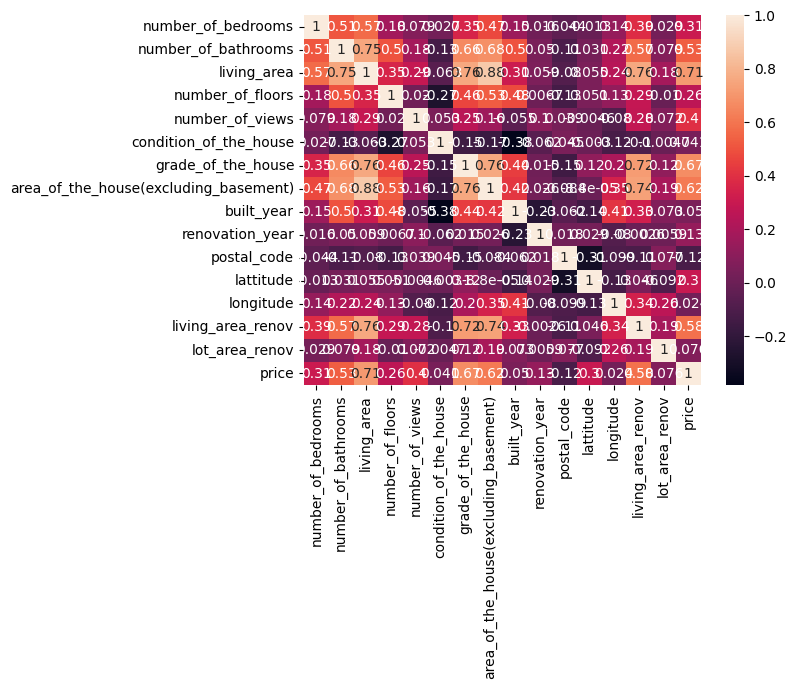

In [54]:
sns.heatmap(df.corr(),annot=True)

In [13]:
columns = df.columns
print(columns) 

Index(['id', 'date', 'number_of_bedrooms', 'number_of_bathrooms',
       'living_area', 'lot_area', 'number_of_floors', 'waterfront_present',
       'number_of_views', 'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')


In [14]:
df.drop(['id','date','area_of_the_basement','lot_area','waterfront_present','number_of_schools_nearby', 'distance_from_the_airport'],axis=1,inplace=True)

df.head()

,number_of_bedrooms,number_of_bathrooms,living_area,number_of_floors,number_of_views,condition_of_the_house,grade_of_the_house,area_of_the_house(excluding_basement),built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,price
0,5,2.50,3650,2.0,4,5,10,3370,1921,0,122003,52.8645,-114.557,2880,5400,2380000
1,4,2.50,2920,1.5,0,5,8,1910,1909,0,122004,52.8878,-114.470,2470,4000,1400000
2,5,2.75,2910,1.5,0,3,8,2910,1939,0,122004,52.8852,-114.468,2940,6600,1200000
3,4,2.50,3310,2.0,0,3,9,3310,2001,0,122005,52.9532,-114.321,3350,42847,838000
4,3,2.00,2710,1.5,0,4,8,1880,1929,0,122006,52.9047,-114.485,2060,4500,805000


In [42]:
x=df.drop('number_of_views',axis=1)
y=df.number_of_views

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
y=le.fit_transform(y)

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Process 2:Build the ANN Model


In [15]:
#Creating ANN skeleton

X = df.drop(columns=['price'])
Y = df[['price']]

In [47]:
classification = keras.models.Sequential()

classification.add(keras.layers.Dense(9, activation='relu', input_shape=(9,)))
classification.add(keras.layers.Dense(9, activation='relu'))
classification.add(keras.layers.Dense(9, activation='relu'))
classification.add(keras.layers.Dense(9, activation='relu'))
classification.add(keras.layers.Dense(1))



compilation process

In [69]:
classification.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
classification.fit(X, Y, epochs=500, callbacks=[keras.callbacks.EarlyStopping(patience=20)])


testing process

In [75]:
df.iloc[5,:]

number_of_bedrooms                            3.0000
number_of_bathrooms                           2.5000
living_area                                2600.0000
number_of_floors                              1.0000
number_of_views                               0.0000
condition_of_the_house                        4.0000
grade_of_the_house                            9.0000
area_of_the_house(excluding_basement)      1700.0000
built_year                                 1951.0000
renovation_year                               0.0000
postal_code                              122007.0000
lattitude                                    52.9133
longitude                                  -114.5900
living_area_renov                          2380.0000
lot_area_renov                             4750.0000
price                                    790000.0000
Name: 5, dtype: float64

In [76]:
df.iloc[3,:]

number_of_bedrooms                            4.0000
number_of_bathrooms                           2.5000
living_area                                3310.0000
number_of_floors                              2.0000
number_of_views                               0.0000
condition_of_the_house                        3.0000
grade_of_the_house                            9.0000
area_of_the_house(excluding_basement)      3310.0000
built_year                                 2001.0000
renovation_year                               0.0000
postal_code                              122005.0000
lattitude                                    52.9532
longitude                                  -114.3210
living_area_renov                          3350.0000
lot_area_renov                            42847.0000
price                                    838000.0000
Name: 3, dtype: float64

In [77]:
test_data1 = np.array([3,2,2600,1,0,4,9,1700,1951])
print(model.predict(test_data1.reshape(1,9), batch_size=1))

1/1 [==============================] - 0s 169ms/step
[[-176.79996]]


In [78]:
df.iloc[85,:]

number_of_bedrooms                            4.0000
number_of_bathrooms                           2.7500
living_area                                2600.0000
number_of_floors                              1.0000
number_of_views                               0.0000
condition_of_the_house                        4.0000
grade_of_the_house                            8.0000
area_of_the_house(excluding_basement)      1300.0000
built_year                                 1960.0000
renovation_year                               0.0000
postal_code                              122032.0000
lattitude                                    52.8682
longitude                                  -114.5870
living_area_renov                          2550.0000
lot_area_renov                             5600.0000
price                                    855000.0000
Name: 85, dtype: float64

save model


In [79]:
model.save('HousePrediction.h5')

In [80]:
df.iloc[250,:]

number_of_bedrooms                            4.0000
number_of_bathrooms                           2.2500
living_area                                1890.0000
number_of_floors                              1.0000
number_of_views                               1.0000
condition_of_the_house                        3.0000
grade_of_the_house                            9.0000
area_of_the_house(excluding_basement)      1470.0000
built_year                                 1963.0000
renovation_year                               0.0000
postal_code                              122047.0000
lattitude                                    52.8616
longitude                                  -114.4930
living_area_renov                          2430.0000
lot_area_renov                             5940.0000
price                                    940000.0000
Name: 250, dtype: float64

In [81]:
old_model = keras.models.load_model('HousePrediction.h5')

test_data3 = np.array([4,2,2140,1,0,3,7,1320,1968])
print(old_model.predict(test_data3.reshape(1,9), batch_size=1))

1/1 [==============================] - 0s 78ms/step
[[-153.48085]]
